# Quantitive instights into UTAAUT raw data

## load in the data with imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("UTAAUTdata.xlsx", sheet_name="Form Responses 1")

df_clean = df.rename(columns=lambda x: x.strip().replace("[","").replace("]",""))

numeric_df = df_clean.select_dtypes(include="number")

## basic stats

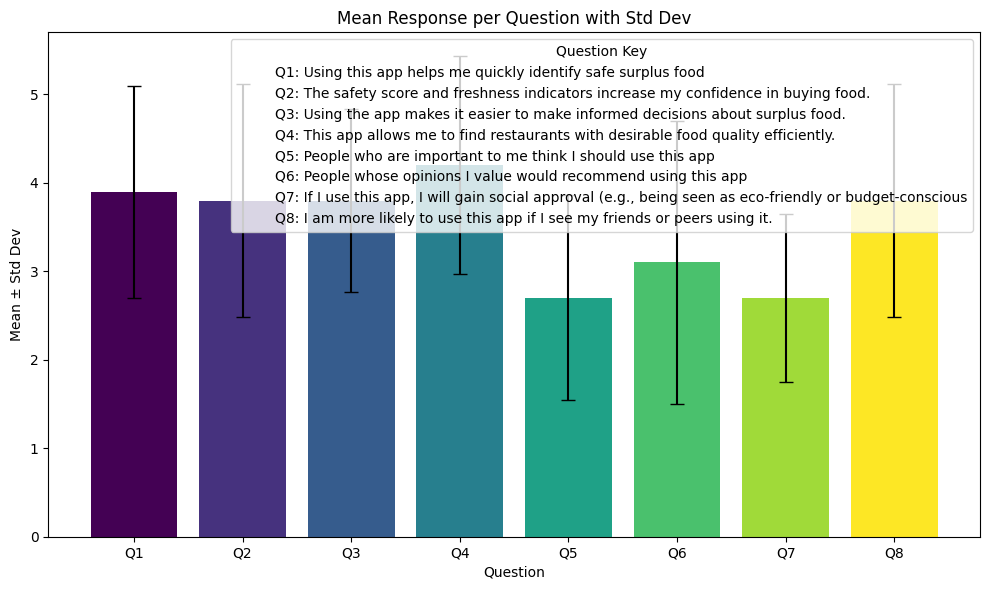

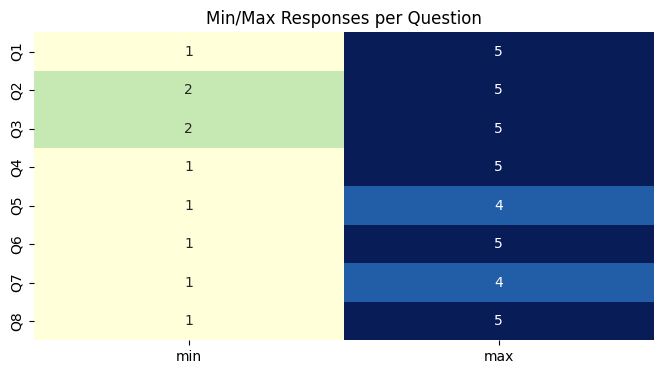

In [17]:

import numpy as np

desc_stats = numeric_df.describe().T[["mean", "std", "min", "max"]]

# Assign short keys Q1..Qn
question_map = {col: f"Q{i+1}" for i, col in enumerate(desc_stats.index)}
desc_stats_short = desc_stats.rename(index=question_map)

# Bar plot with Matplotlib (avoids seaborn deprecation)
plt.figure(figsize=(10,6))
x = np.arange(len(desc_stats_short))
plt.bar(x, desc_stats_short["mean"], yerr=desc_stats_short["std"], 
        capsize=5, color=plt.cm.viridis(np.linspace(0,1,len(x))))
plt.xticks(x, desc_stats_short.index)
plt.title("Mean Response per Question with Std Dev")
plt.ylabel("Mean ± Std Dev")
plt.xlabel("Question")

# Legend mapping Q1..Qn
handles = [plt.Line2D([0], [0], color='black', lw=0, label=f"{v}: {k}") 
           for k, v in question_map.items()]
plt.legend(handles=handles, loc='upper right', title="Question Key")

plt.tight_layout()
plt.show()

# Optional: show min/max as a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(desc_stats_short[["min","max"]], annot=True, cmap="YlGnBu", cbar=False, fmt=".0f")
plt.title("Min/Max Responses per Question")
plt.show()

## Average rating per question


/var/folders/1z/wcjk42d12b7d9znpb2ybc0kr0000gn/T/ipykernel_84241/3212060828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


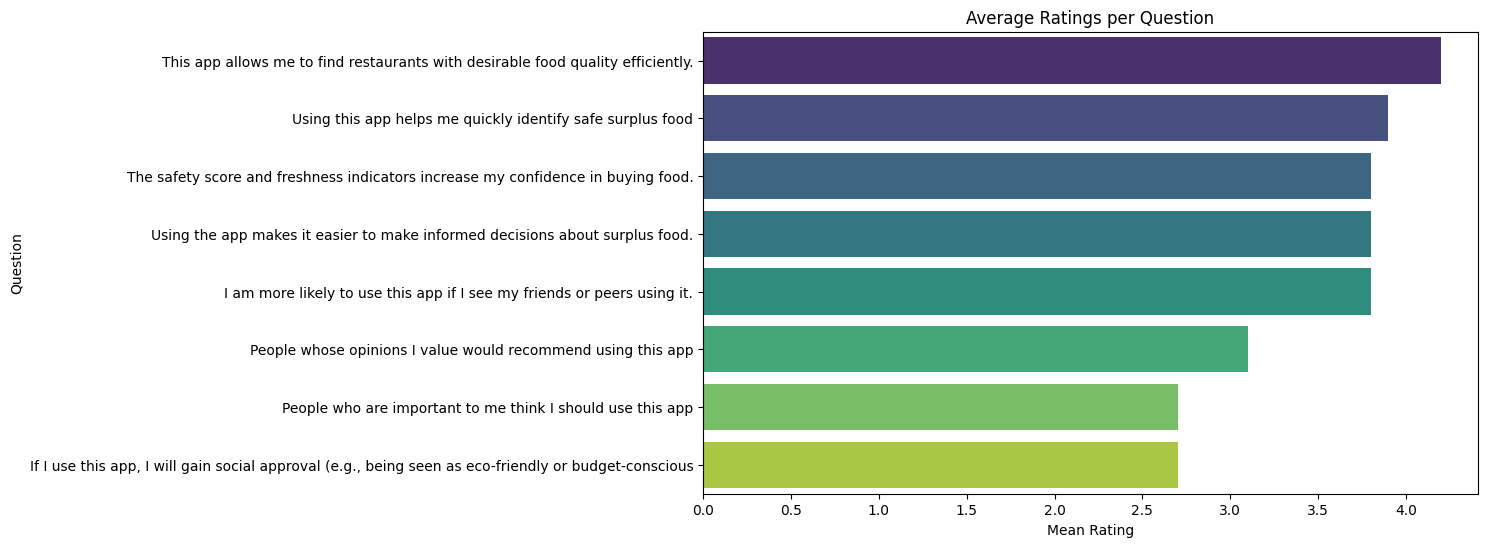

In [6]:
avg_scores = numeric_df.mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title("Average Ratings per Question")
plt.xlabel("Mean Rating")
plt.ylabel("Question")
plt.show()


## corrilations

/var/folders/1z/wcjk42d12b7d9znpb2ybc0kr0000gn/T/ipykernel_84241/2884860944.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0,0,0.8,1])


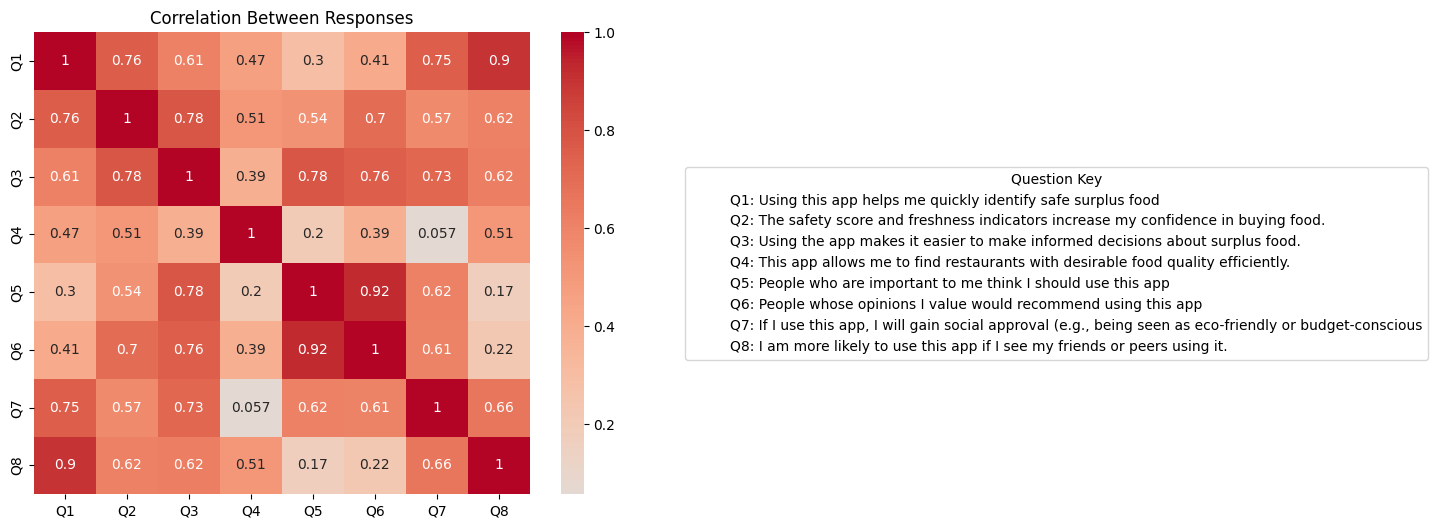

In [15]:
# Assign short keys Q1..Qn
question_map = {col: f"Q{i+1}" for i, col in enumerate(numeric_df.columns)}
numeric_df_short = numeric_df.rename(columns=question_map)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df_short.corr(), annot=True, cmap="coolwarm", center=0,
            xticklabels=numeric_df_short.columns,
            yticklabels=numeric_df_short.columns)
plt.title("Correlation Between Responses")

# Add legend mapping Q1..Qn outside the plot
handles = [plt.Line2D([0], [0], color='black', lw=0, label=f"{v}: {k}") 
           for k, v in question_map.items()]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.3, 0.5), title="Question Key")

plt.tight_layout(rect=[0,0,0.8,1])
plt.show()

## Distributions by question

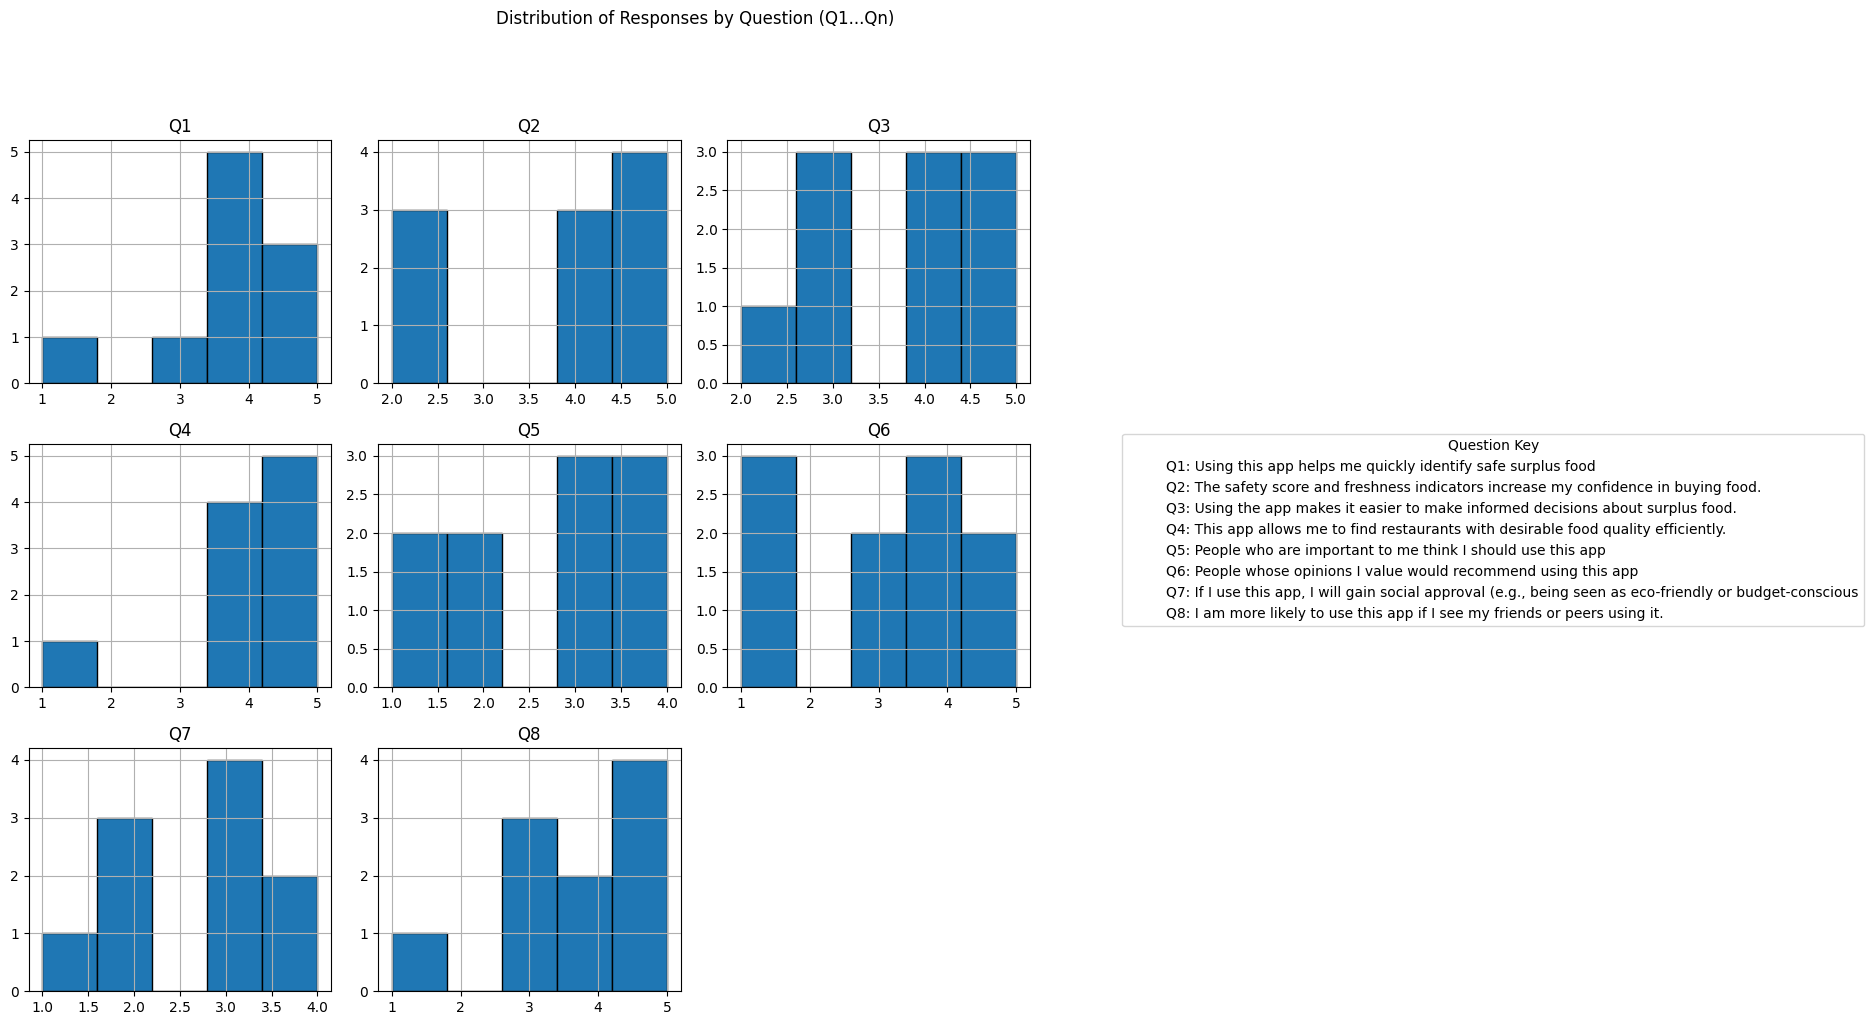

In [19]:
# Assign short keys Q1..Qn
question_map = {col: f"Q{i+1}" for i, col in enumerate(numeric_df.columns)}
numeric_df_short = numeric_df.rename(columns=question_map)

# Plot histograms
axes = numeric_df_short.hist(figsize=(14,10), bins=5, edgecolor="black")
plt.suptitle("Distribution of Responses by Question (Q1...Qn)", y=1.02)

# Flatten axes array
axes = axes.flatten()

# Add titles to subplots
for ax, col in zip(axes, numeric_df_short.columns):
    ax.set_title(col)

# Adjust layout to leave room for legend
plt.tight_layout(rect=[0,0,0.75,0.96])

# Add legend to the right, fully outside plots
fig = plt.gcf()
handles = [plt.Line2D([0], [0], color='black', lw=0, label=f"{v}: {k}") 
           for k, v in question_map.items()]
fig.legend(handles=handles, loc='center left', bbox_to_anchor=(0.8, 0.5), title="Question Key")

plt.show()

## median of scattered distribution

/var/folders/1z/wcjk42d12b7d9znpb2ybc0kr0000gn/T/ipykernel_84241/1357793623.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0,0,0.8,1])


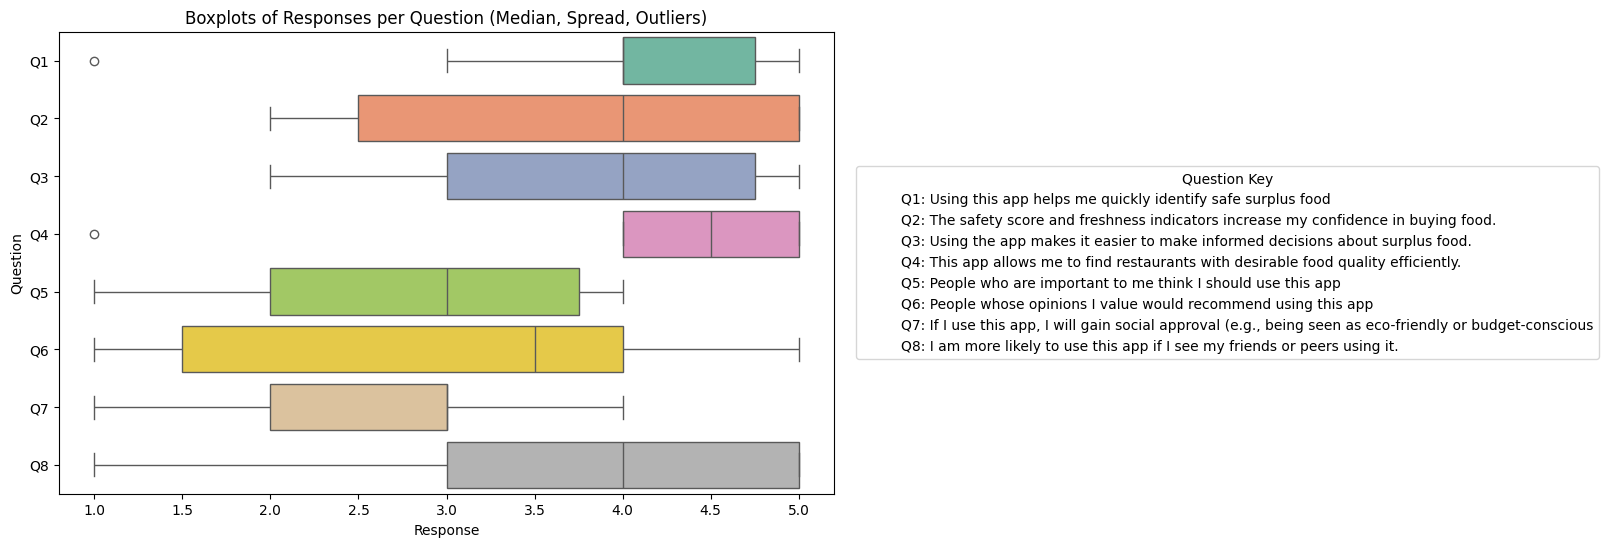

In [21]:


plt.figure(figsize=(10,6))
sns.boxplot(data=numeric_df_short, orient="h", palette="Set2")
plt.title("Boxplots of Responses per Question (Median, Spread, Outliers)")
plt.xlabel("Response")
plt.ylabel("Question")

# Add legend mapping Q1..Qn outside the plot
question_map = {col: f"Q{i+1}" for i, col in enumerate(numeric_df.columns)}
handles = [plt.Line2D([0], [0], color='black', lw=0, label=f"{v}: {k}") 
           for k, v in question_map.items()]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.02, 0.5), title="Question Key")

plt.tight_layout(rect=[0,0,0.8,1])
plt.show()



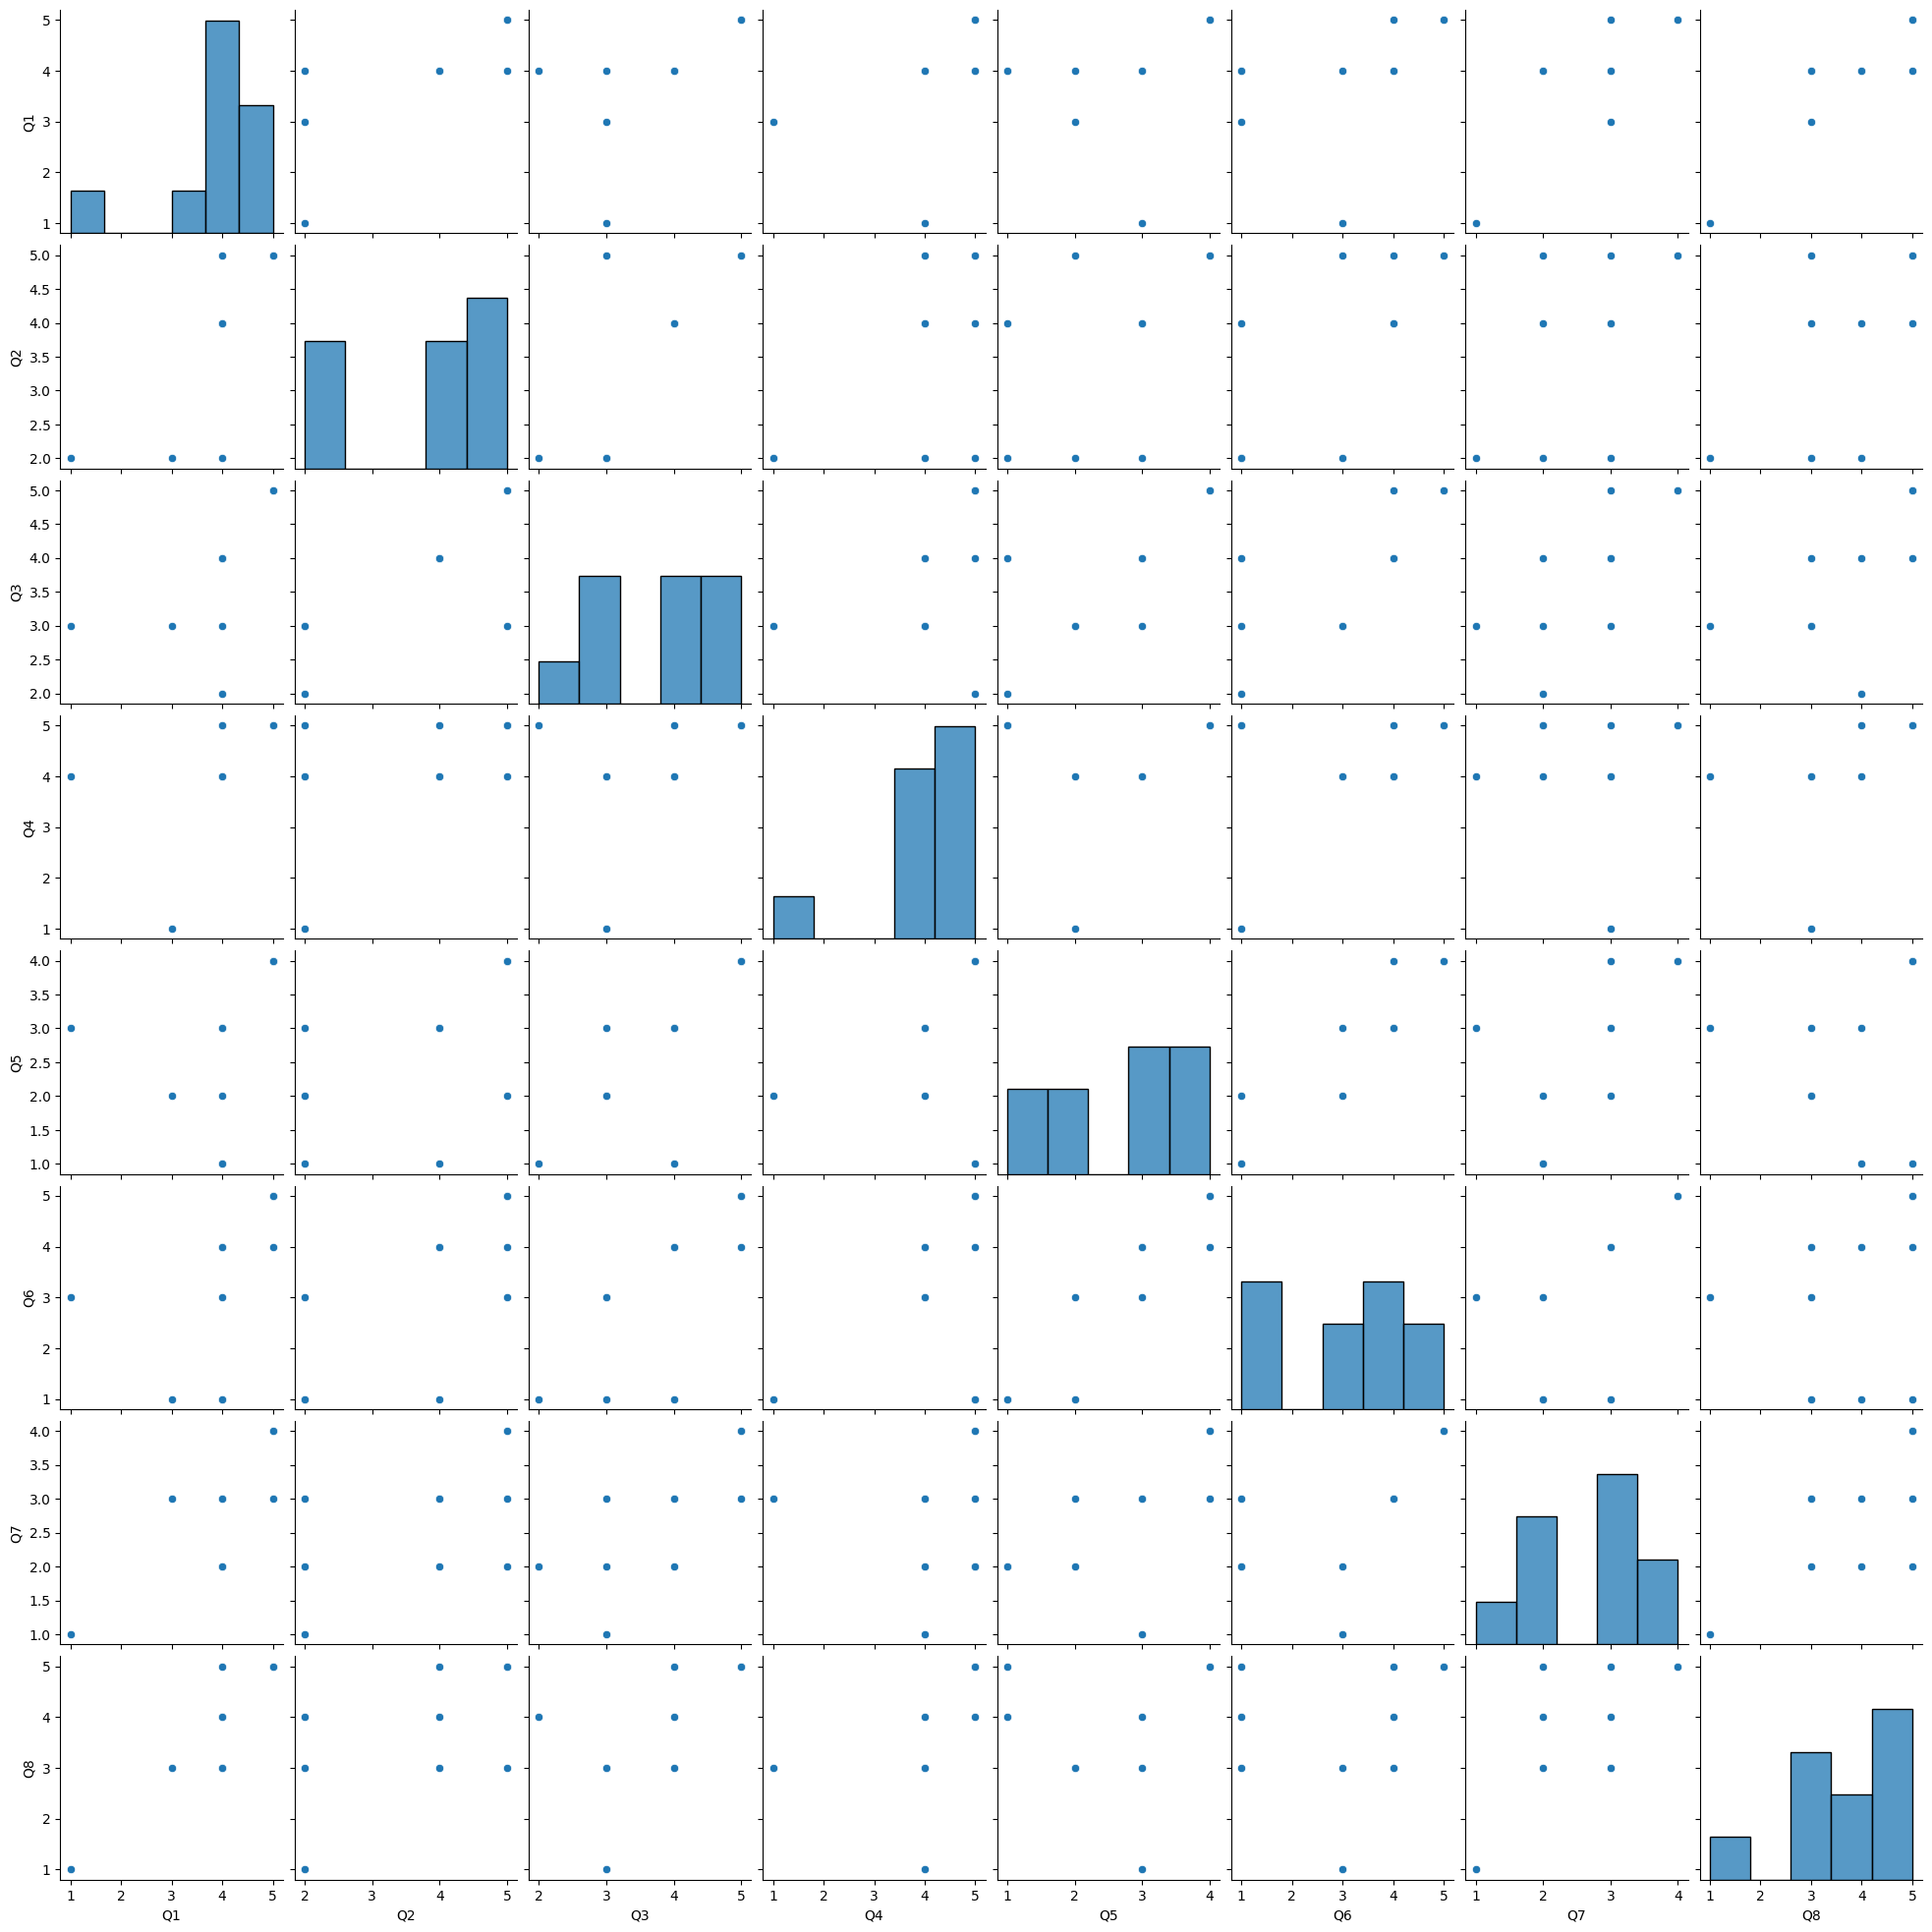

In [22]:
sns.pairplot(numeric_df_short)
